# Missing Values Imputations

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image


![](img/missing_value.png)

In [5]:
df = pd.DataFrame(np.random.randn(10,3))
df.iloc[::2,0] = np.nan; df.iloc[::4,1] = np.nan; df.iloc[::3,2] = np.nan;

In [6]:
df

,0,1,2
0,NaN,NaN,NaN
1,0.545590,0.897298,-0.236557
2,NaN,0.649050,0.828997
3,0.098352,-0.185972,NaN
4,NaN,NaN,-0.883180
5,0.059892,1.541073,-0.019102
6,NaN,-2.359832,NaN
7,0.293691,-0.090473,-1.208287
8,NaN,NaN,0.318247
9,1.594042,-0.941601,NaN


# Let's quantify (In Percentage) the amount of missing values of all features

In [7]:
df.isnull().sum()*100/df.shape[0] #shape[0] contains no. of records  

0    50.0
1    30.0
2    40.0
dtype: float64

# Remove missing value in pandas:

 To drop the __Records__ or rows

In [14]:
df.dropna(axis = 0)#Default = 0



,0,1,2
1,0.545590,0.897298,-0.236557
5,0.059892,1.541073,-0.019102
7,0.293691,-0.090473,-1.208287


To drp the __Features__ or Columns

In [15]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8
9


# Use inplace = True, if you wish to change the existing DataFrame while dropping

# Drop all records that have any missing/NaN values

In [17]:
df.dropna()

,0,1,2
1,-0.490035,-0.237641,-0.432416
5,0.504362,-0.680790,1.096434
7,0.590023,-1.379765,-1.415155


# Drop the record only if ALL features of that records are missing/NaN

In [8]:
df.dropna(how='all')

,0,1,2
1,-0.951016,-0.336729,0.130848
2,NaN,0.010362,0.709686
3,1.111429,0.212872,NaN
4,NaN,NaN,0.855869
5,-0.917762,0.436545,-2.450225
6,NaN,0.077319,NaN
7,0.789682,0.790523,-0.138070
8,NaN,NaN,-0.840630
9,-0.109723,0.065053,NaN


# Drop the record if it does not have atleast 2 NON MISSING features

The above says that all most all features are missing. Thera are only 2 non missing features

In [11]:
df.dropna(thresh=2)

,0,1,2
1,-0.951016,-0.336729,0.130848
2,NaN,0.010362,0.709686
3,1.111429,0.212872,NaN
5,-0.917762,0.436545,-2.450225
7,0.789682,0.790523,-0.138070
9,-0.109723,0.065053,NaN


# Drop the record which has specific feature missing

Here we are trying to delete the record which does not have 2nd feature.

In [13]:
df.dropna(subset=[1])

,0,1,2
1,-0.951016,-0.336729,0.130848
2,NaN,0.010362,0.709686
3,1.111429,0.212872,NaN
5,-0.917762,0.436545,-2.450225
6,NaN,0.077319,NaN
7,0.789682,0.790523,-0.138070
9,-0.109723,0.065053,NaN


# Replace missing values with newly calculated values:

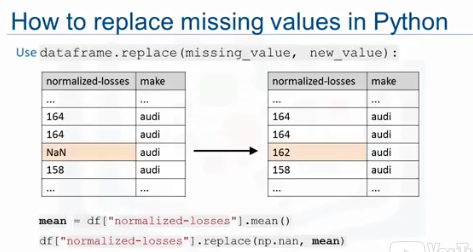

In [21]:
Image("missing_replacement.png")

Ah we have a great function by python to do it automaticall

Let's use __sklearn.preprocessing.Imputer__

__Important parameters:__ 

- strategy: What to replace the missing value with: mean / median / most_frequent

- axis: Boolean. Whether to replace along rows or columns

- Attribute: 
 statistics_ : The imputer-filled values for each feature

_Important methods_

__fit(X[, y])__	Fit the model with X.

__transform(X)__	Replace all the missing values in X.


In [12]:
import numpy as np
from sklearn.preprocessing import Imputer


In [13]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [1]:
#Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))                           


NameError: name 'np' is not defined

# <font color=orange>Warning</font>

One has to be mindful that in python (and numpy), the nan's don’t compare equal, but None's do. Note that Pandas/numpy uses the fact that np.nan != np.nan, and treats None like np.nan.
In [11]: None == None
Out[11]: True

In [12]: np.nan == np.nan
Out[12]: False


For Forward fill and backward fill, use bellow:

In [1]:
df = df.fillna(method='ffill')
df.head()

NameError: name 'df' is not defined

# Imputation using KNN

In [1]:
from imputer import Imputer
impute = Imputer()

In [2]:
for val in df.columns[:-1]:
    print(val)
    X_imputed  = impute.knn(X=df, column=val)#Default K=10
    df[val] = X_imputed

NameError: name 'df' is not defined